In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("sonnet_or_shanty.csv.gz")
df.head()

,text_type,text
0,sonnet,\r\n From fairest creatures we desire increas...
1,sonnet,\r\n When forty winters shall besiege thy bro...
2,sonnet,\r\n Look in thy glass and tell the face thou...
3,sonnet,"\r\n Unthrifty loveliness, why dost thou spen..."
4,sonnet,"\r\n Those hours, that with gentle work did f..."


# Text cleaning

In [17]:
df["text_cleaned"] = df["text"].str.strip().str.replace("\r\n", "")
df.head()

,text_type,text,text_cleaned
0,sonnet,\r\n From fairest creatures we desire increas...,"From fairest creatures we desire increase, Th..."
1,sonnet,\r\n When forty winters shall besiege thy bro...,"When forty winters shall besiege thy brow, An..."
2,sonnet,\r\n Look in thy glass and tell the face thou...,Look in thy glass and tell the face thou viewe...
3,sonnet,"\r\n Unthrifty loveliness, why dost thou spen...","Unthrifty loveliness, why dost thou spend Upo..."
4,sonnet,"\r\n Those hours, that with gentle work did f...","Those hours, that with gentle work did frame ..."


In [18]:
df["text_cleaned"] = df["text_cleaned"].str.strip().str.replace("\n", " ")
df["text_cleaned"] = df["text_cleaned"].str.strip().str.replace("\xa0", " ")
df["text_cleaned"]

0      From fairest creatures we desire increase,  Th...
1      When forty winters shall besiege thy brow,  An...
2      Look in thy glass and tell the face thou viewe...
3      Unthrifty loveliness, why dost thou spend  Upo...
4      Those hours, that with gentle work did frame  ...
                             ...                        
201    The worst old ship that ever did sail, Sailed ...
202    Oh, where am I to go, M'Johnnies, oh where am ...
203    Whiskey is the life of man, Whiskey, Johnny! O...
204    As we were a-fishing off Happisburgh light Sho...
205    We'll heave him up an away we'll go 'Way, me S...
Name: text_cleaned, Length: 206, dtype: object

In [19]:
df["text_cleaned"] = df["text_cleaned"].str.lower()
df.head()

,text_type,text,text_cleaned
0,sonnet,\r\n From fairest creatures we desire increas...,"from fairest creatures we desire increase, th..."
1,sonnet,\r\n When forty winters shall besiege thy bro...,"when forty winters shall besiege thy brow, an..."
2,sonnet,\r\n Look in thy glass and tell the face thou...,look in thy glass and tell the face thou viewe...
3,sonnet,"\r\n Unthrifty loveliness, why dost thou spen...","unthrifty loveliness, why dost thou spend upo..."
4,sonnet,"\r\n Those hours, that with gentle work did f...","those hours, that with gentle work did frame ..."


In [20]:
from nltk.corpus import stopwords

en_stopwords = stopwords.words('english')

In [21]:
df.loc[0, "text_cleaned"]

"from fairest creatures we desire increase,  that thereby beauty's rose might never die,  but as the riper should by time decease,  his tender heir might bear his memory:  but thou, contracted to thine own bright eyes,  feed'st thy light's flame with self-substantial fuel,  making a famine where abundance lies,  thyself thy foe, to thy sweet self too cruel:  thou that art now the world's fresh ornament,  and only herald to the gaudy spring,  within thine own bud buriest thy content,  and tender churl mak'st waste in niggarding:        pity the world, or else this glutton be,        to eat the world's due, by the grave and thee."

In [22]:
def remove_stopwords(text):
    words = text.split(" ")
    words_no_stopwords = [w for w in words if w not in en_stopwords]
    return " ".join(words_no_stopwords)

remove_stopwords(df.loc[0, "text_cleaned"])

"fairest creatures desire increase,  thereby beauty's rose might never die,  riper time decease,  tender heir might bear memory:  thou, contracted thine bright eyes,  feed'st thy light's flame self-substantial fuel,  making famine abundance lies,  thyself thy foe, thy sweet self cruel:  thou art world's fresh ornament,  herald gaudy spring,  within thine bud buriest thy content,  tender churl mak'st waste niggarding:        pity world, else glutton be,        eat world's due, grave thee."

## Analysis

In [23]:
df["text_length"] = df["text_cleaned"].str.len()
df.head()

,text_type,text,text_cleaned,text_length
0,sonnet,\r\n From fairest creatures we desire increas...,"from fairest creatures we desire increase, th...",634
1,sonnet,\r\n When forty winters shall besiege thy bro...,"when forty winters shall besiege thy brow, an...",653
2,sonnet,\r\n Look in thy glass and tell the face thou...,look in thy glass and tell the face thou viewe...,632
3,sonnet,"\r\n Unthrifty loveliness, why dost thou spen...","unthrifty loveliness, why dost thou spend upo...",614
4,sonnet,"\r\n Those hours, that with gentle work did f...","those hours, that with gentle work did frame ...",649


In [24]:
df.groupby("text_type")["text_length"].mean()

text_type
shanty    857.115385
sonnet    633.597403
Name: text_length, dtype: float64

<AxesSubplot:title={'center':'text_length'}, xlabel='text_type'>

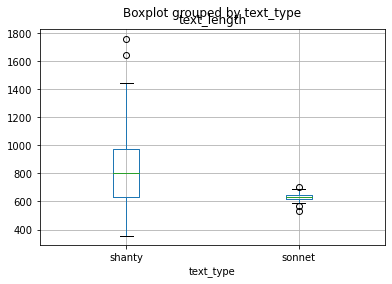

In [25]:
df.boxplot(column="text_length", by="text_type")

In [26]:
df.sort_values("text_length", ascending=False).head()

,text_type,text,text_cleaned,text_length
170,shanty,"\n\nOh, don't yiz hear the old man say?\nGoodb...","oh, don't yiz hear the old man say? goodbye, f...",1754
178,shanty,\n\nWhen first I landed in Liverpool I went up...,when first i landed in liverpool i went upon t...,1645
155,shanty,"\n\nMe bonnie bunch o’roses O!\nCome down, ye ...","me bonnie bunch o’roses o! come down, ye blood...",1443
181,shanty,\n\nIt was cold and dreary morning in December...,it was cold and dreary morning in december (de...,1354
186,shanty,"\n\nOh! Sally Brown, she's the gal for me boys...","oh! sally brown, she's the gal for me boys rol...",1334


In [27]:
print(df.loc[170, "text"])



Oh, don't yiz hear the old man say?
Goodbye, fare-ye-well! Goodbye, fare-ye-well!
Oh, don't yiz hear the old man say?
Hoor-raw me boys! We're homeward bound!

We're Homeward bound to Liverpool Town,
Goodbye, fare-ye-well! Goodbye, fare-ye-well!
Where all them judies, they will come down
Hoor-raw me boys! We're homeward bound!

An' when we gits to the Wallasey Gates
Goodbye, fare-ye-well! Goodbye, fare-ye-well!
Sally an' Olly for their flash men do wait
Hoor-raw me boys! We're homeward bound!

An' one to the other ye'll hear them say,
Goodbye, fare-ye-well! Goodbye, fare-ye-well!
Here comes Johnny with his fourteen mont's pay!
Hoor-raw me boys! We're homeward bound!

We meet these fly gals an' we'll ring the ol' bell,
Goodbye, fare-ye-well! Goodbye, fare-ye-well!
With them judies, we'll raise merry hell
Hoor-raw me boys! We're homeward bound!

We're homeward bound to the gals o' the town.
Goodbye, fare-ye-well! Goodbye, fare-ye-well!
And stamp up me bullies an' heave it around.
Hoor-r

#### Basic model using length

In [49]:
from sklearn.model_selection import train_test_split

X = df[["text_cleaned", "text_length"]]
y = df["text_type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(144, 2) (62, 2)


In [50]:
y_train.value_counts(normalize=True)

sonnet    0.756944
shanty    0.243056
Name: text_type, dtype: float64

In [51]:
y_test.value_counts(normalize=True)

sonnet    0.725806
shanty    0.274194
Name: text_type, dtype: float64

In [53]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train[["text_length"]], y_train)

LogisticRegression()

In [54]:
lr.classes_

array(['shanty', 'sonnet'], dtype=object)

In [55]:
lr.coef_

array([[-0.02095439]])

In [56]:
lr.predict_proba([[400]])[0][1]

0.9990423238530435

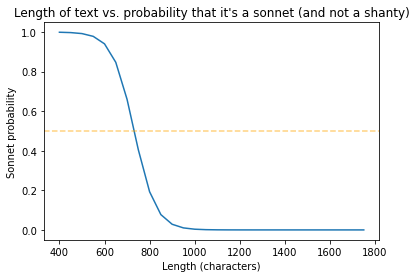

In [57]:
import numpy as np
import matplotlib.pyplot as plt

lengths = np.arange(400, 1800, 50)
probabilities = []

for length in lengths:
    proba = lr.predict_proba([[length]])[0][1]
    probabilities.append(proba)

fig, ax = plt.subplots()

ax.plot(lengths, probabilities)
ax.set(title="Length of text vs. probability that it's a sonnet (and not a shanty)",
       xlabel="Length (characters)",
       ylabel="Sonnet probability")

ax.axhline(0.5, linestyle="dashed", color="orange", alpha=0.5)

plt.show()

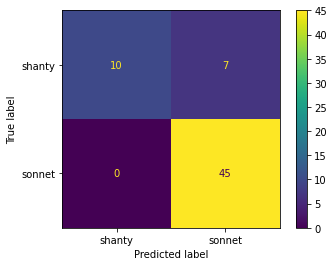

In [46]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr, X_test, y_test);

### Better model using document-term matrix

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(binary=True)

X_train_transformed = vec.fit_transform(X_train["text_cleaned"])

In [75]:
train_df = pd.DataFrame(
    data=X_train_transformed.todense(),
    columns=vec.get_feature_names()
)

train_df.head()

,50,abhor,abide,aboard,about,above,absence,absent,abundance,abundant,...,york,you,young,youngly,your,yours,yourself,youth,youthful,zealous
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,0,0,0


In [83]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=23)

rf.fit(train_df, y_train)

RandomForestClassifier(n_estimators=23)

In [85]:
df_features = pd.DataFrame(
    data={
        "feature": vec.get_feature_names(),
        "importance": rf.feature_importances_
    }
)

df_features.head()

,feature,importance
0,50,0.0
1,abhor,0.0
2,abide,0.0
3,aboard,0.0
4,about,0.0


In [89]:
df_features[df_features["importance"] > 0].sort_values("importance", ascending=False)

,feature,importance
2078,re,0.054127
2973,which,0.037873
470,chorus,0.035565
2653,that,0.032946
2322,she,0.024663
...,...,...
2518,store,0.000008
1666,methinks,0.000006
1657,men,0.000003
1726,muse,0.000002


In [90]:
X_test_text = vec.transform(X_test["text_cleaned"])

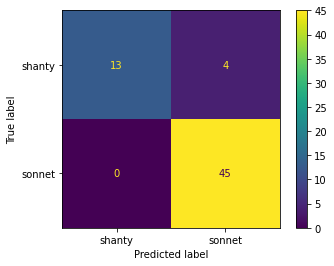

In [91]:
plot_confusion_matrix(rf, X_test_text, y_test);

Look at some of these weird words from feature importances

In [93]:
train_df[train_df["re"] == 1].head()

,50,abhor,abide,aboard,about,above,absence,absent,abundance,abundant,...,york,you,young,youngly,your,yours,yourself,youth,youthful,zealous
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
39,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
40,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
61,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [103]:
[w for w in df.loc[39, "text_cleaned"].split(" ") if w.startswith("re")]

['receivest,', 'refusest.']